# KNN_Neighbours

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

## Importing the dataset

In [2]:
dataset = pd.read_csv('../Dataset/breast_cancer_wisconsin.csv')

In [3]:
print("Dataset Information");
print("__________________________")
pprint(dataset.info());
print("\n")
print("Number of null data:\n")
print("__________________________")
pprint(pd.isnull(dataset).sum())

Dataset Information
__________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


Number of null data:

__________________________
Clump_thickness                 0
Uniformity_

Proccess null value:

In [4]:
threshold = 0.05;

if dataset.isna().sum().sum() / dataset.size < threshold:
    dataset = dataset.dropna()
else:
    for col in dataset.columns:
        if dataset[col].dtype in ['float64', 'int64']:
            # Điền NaN bằng mean cho dữ liệu số
            dataset[col] = dataset[col].fillna(dataset[col].mean())
        else:
            # Điền NaN bằng giá trị phổ biến nhất cho dữ liệu dạng object/categorical
            dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

print("Number of null data:\n")
print("__________________________")
pprint(pd.isnull(dataset).sum())

Number of null data:

__________________________
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


## Declare features and dependant variables

On the features, remove the "Sample code number" because it is not relevant to the prediction

In [5]:
X = dataset.iloc[:,:-1].values;
pprint(X)


array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])


In [6]:
y = dataset.iloc[:, -1].values;
pprint(y);

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0);

print("DataSet Splitting:\n");
print("_______________________________")
print("X_train: ", np.size(X_train));
print("X_test: ", np.size(X_test));
print("y_train:", np.size(y_train));
print("y_test", np.size(y_test));


DataSet Splitting:

_______________________________
X_train:  4914
X_test:  1233
y_train: 546
y_test 137


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Feature Scaling Applied Successfully!")
print("_____________________________________")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\nTraining set - First 5 samples after scaling:")
pprint(X_train[:5])
print("\nTest set - First 5 samples after scaling:")
pprint(X_test[:5])

Feature Scaling Applied Successfully!
_____________________________________
X_train shape: (546, 9)
X_test shape: (137, 9)

Training set - First 5 samples after scaling:
array([[ 1.98839518, -0.69781134, -0.74152574, -0.63363747, -0.54871998,
         1.81553572,  0.61907387,  0.34532102, -0.33863738],
       [-1.22468404, -0.69781134, -0.74152574, -0.63363747, -0.99789705,
        -0.68279599, -0.18860673, -0.62157783, -0.33863738],
       [ 0.20335117, -0.69781134, -0.74152574, -0.63363747, -0.54871998,
        -0.68279599, -0.18860673, -0.62157783, -0.33863738],
       [-0.51066644, -0.69781134, -0.40497291, -0.63363747, -0.54871998,
        -0.68279599, -0.59244703, -0.62157783, -0.33863738],
       [ 1.27437758, -0.37244414, -0.06842008, -0.63363747,  1.24798832,
        -0.12761116,  1.42675446, -0.62157783, -0.33863738]])

Test set - First 5 samples after scaling:
array([[-1.22468404, -0.69781134, -0.74152574, -0.63363747, -0.54871998,
         0.42757366, -0.99628733, -0.621577

## Training the Linear SVM model on the Training set

In [9]:
from sklearn.svm import SVC;
classifier = SVC(kernel='linear', random_state=0);
classifier.fit(X_train, y_train);

## Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)
pprint(y_pred)

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2], dtype=int64)


## Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix;

cm = confusion_matrix(y_test, y_pred);
pprint(cm)

array([[83,  4],
       [ 2, 48]], dtype=int64)


## Visualizing the Training set results

C:\Users\Admin\AppData\Local\Temp\ipykernel_21692\3834832539.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


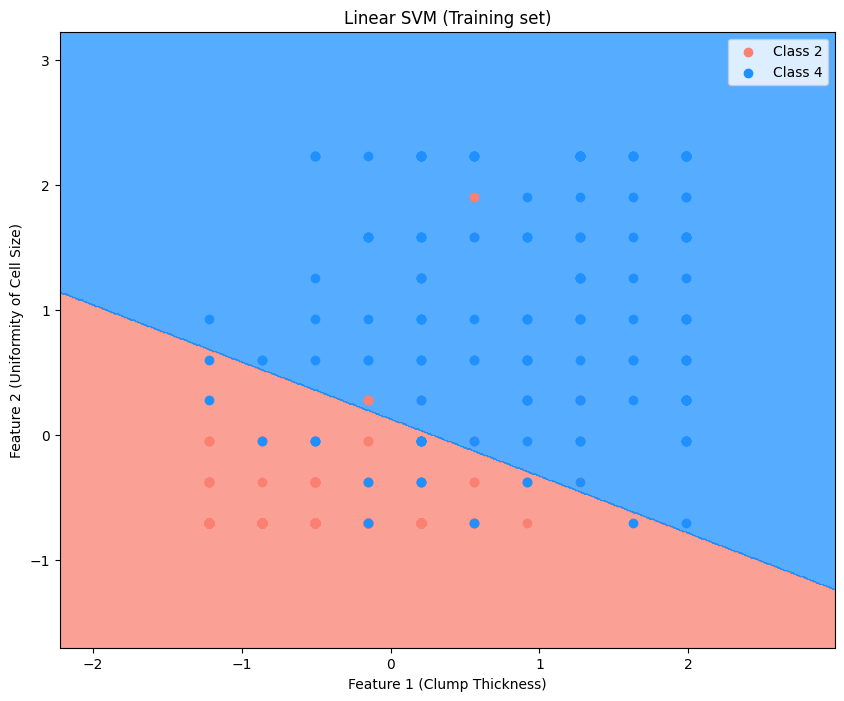

Visualization uses Linear SVM (same as main classifier)


In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# We'll use only the first two features for visualization (since we can't visualize 9D)
X_set, y_set = X_train[:, [0, 1]], y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Create a temporary Linear SVM classifier with only 2 features using same parameters as main classifier
classifier_2d = SVC(kernel='linear', random_state=0)
classifier_2d.fit(X_set, y_set)

plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, classifier_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = f'Class {j}')
plt.title('Linear SVM (Training set)')
plt.xlabel('Feature 1 (Clump Thickness)')
plt.ylabel('Feature 2 (Uniformity of Cell Size)')
plt.legend()
plt.show()

print("Visualization uses Linear SVM (same as main classifier)")

## Testing different SVM kernels and C parameters

In [13]:
svm_test = 0
if svm_test == 1:
    # Test different SVM configurations
    svm_configs = [
        {'kernel': 'linear', 'C': 1, 'name': 'Linear (C=1)'},
        {'kernel': 'linear', 'C': 0.1, 'name': 'Linear (C=0.1)'},
        {'kernel': 'linear', 'C': 10, 'name': 'Linear (C=10)'},
        {'kernel': 'rbf', 'C': 1, 'name': 'RBF (C=1)'},
        {'kernel': 'poly', 'degree': 3, 'C': 1, 'name': 'Polynomial (degree=3)'},
        {'kernel': 'sigmoid', 'C': 1, 'name': 'Sigmoid (C=1)'}
    ]
    
    X_set, y_set = X_train[:, [0, 1]], y_train
    
    # Store results for comparison
    results = []
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for idx, config in enumerate(svm_configs):
        # Create SVM classifier with different configuration
        svm_params = {k: v for k, v in config.items() if k not in ['name']}
        svm_params['random_state'] = 0
        
        classifier_svm = SVC(**svm_params)
        classifier_svm.fit(X_set, y_set)
        
        # Calculate accuracy on 2D data
        accuracy_2d = classifier_svm.score(X_set, y_set)
        results.append((config['name'], accuracy_2d))
        
        # Create mesh for visualization
        X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                            np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
        
        # Plot decision boundary
        axes[idx].contourf(X1, X2, classifier_svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                          alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
        
        # Plot data points
        for i, j in enumerate(np.unique(y_set)):
            axes[idx].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                            c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = f'Class {j}')
        
        axes[idx].set_title(f'{config["name"]}\nAccuracy: {accuracy_2d:.3f}')
        axes[idx].set_xlabel('Feature 1')
        axes[idx].set_ylabel('Feature 2')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()
    
    # Print comparison results
    print("SVM Configuration Comparison Results (on 2D data):")
    print("=" * 55)
    for name, acc in results:
        print(f"{name:20}: Accuracy = {acc:.4f}")
    
    # Find best configuration
    best_config, best_acc = max(results, key=lambda x: x[1])
    print(f"\nBest Configuration: {best_config} with accuracy {best_acc:.4f}")
    
    # Now test on full 9D data for more comprehensive comparison
    print("\n" + "=" * 60)
    print("Full 9D Data Comparison:")
    print("=" * 60)
    
    full_results = []
    for config in svm_configs:
        svm_params = {k: v for k, v in config.items() if k not in ['name']}
        svm_params['random_state'] = 0
        
        classifier_full = SVC(**svm_params)
        classifier_full.fit(X_train, y_train)
        
        # Test on both training and test sets
        train_acc = classifier_full.score(X_train, y_train)
        test_acc = classifier_full.score(X_test, y_test)
        full_results.append((config['name'], train_acc, test_acc))
        
        print(f"{config['name']:20}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")
    
    # Find best configuration based on test accuracy
    best_config_full, best_train, best_test = max(full_results, key=lambda x: x[2])
    print(f"\nBest Configuration for 9D: {best_config_full}")
    print(f"Test Accuracy: {best_test:.4f}, Train Accuracy: {best_train:.4f}")
    
    # Analysis of overfitting
    print(f"\nOverfitting Analysis:")
    print("=" * 30)
    for name, train_acc, test_acc in full_results:
        overfitting = train_acc - test_acc
        print(f"{name:20}: Overfitting = {overfitting:.4f}")
    
else:
    print("SVM comparison skipped. Set svm_test = 1 to run comparison.")

SVM comparison skipped. Set svm_test = 1 to run comparison.


## Visualizing the Test set results

C:\Users\Admin\AppData\Local\Temp\ipykernel_21692\3050397995.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


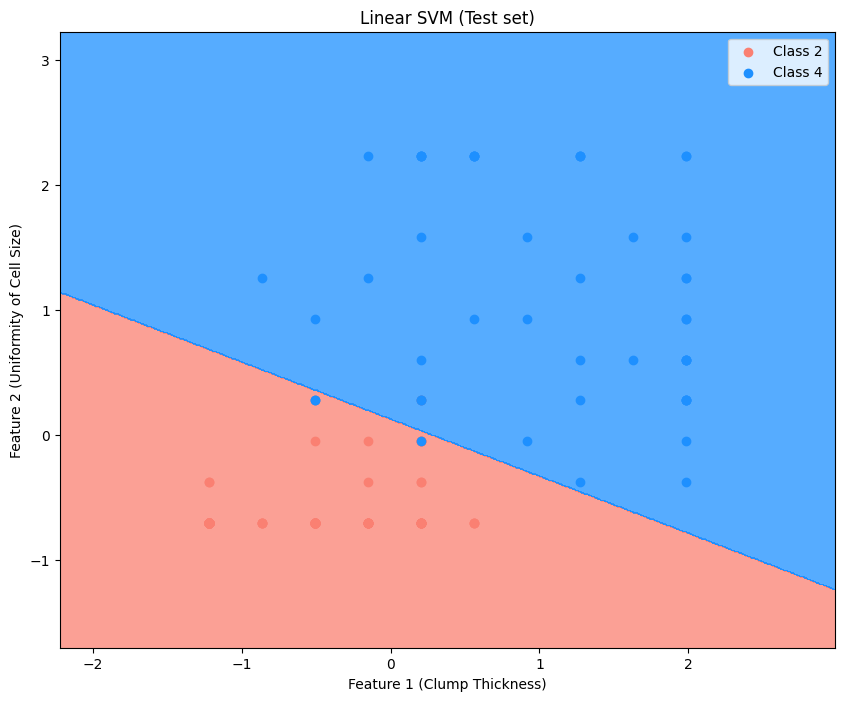

Test set visualization uses Linear SVM (same as main classifier)


In [14]:
# Visualize Test set results using the same 2 features for Linear SVM
X_set, y_set = X_test[:, [0, 1]], y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, classifier_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = f'Class {j}')
plt.title('Linear SVM (Test set)')
plt.xlabel('Feature 1 (Clump Thickness)')
plt.ylabel('Feature 2 (Uniformity of Cell Size)')
plt.legend()
plt.show()

print("Test set visualization uses Linear SVM (same as main classifier)")

## Computing the accuracy with k-Fold Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracies:  ", format(accuracies.mean() * 100), " %")
print("Standard Deviation:  ", format(accuracies.std() * 100), " %")

Accuracies:   97.07070707070707  %
Standard Deviation:   2.1943977876398093  %
